<a href="https://colab.research.google.com/github/Javier-CN/Python_intro/blob/main/Proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#                                  Pozo de potencial infinito 1D

El programa resulve la ecuacion de Schrodinger para este sistema fisico, esta ecuacion es

$-\frac{(\hbar)^2}{2m} \frac{d^2\psi}{dx^2}+V(x)\psi=E\psi$

En este caso el potencial sera 0 dentro del pozo,fuera de el no hay funcion de onda, ademas para fines del probelma consideraremos que la forma de las eigen-energias es conocidad

$E_n=\frac{(\pi)^2(\hbar)^2}{2mL^2}n^2$

De esta manera la ecuacion se Schrodinger se reduce a la siguiente ecuacion diferencial

$\frac{d^2\psi}{dx^2}=-(\frac{n\pi}{L})^2\psi$

las soluciones analiticas a esta ecuacion son

$\psi_n= (\frac{2}{L})^\frac{1}{2}sen(\frac{n\pi x}{L})$

La dendidad de probabilidad normalizada es

$|\psi_n|^2= (sen(\frac{n\pi x}{L})^2$

El procedimiento para obtener la solucion numerica sera reducir de orden la ecuacion diferencial obteniendo

$d\psi=z$ \\
$dz=-(\frac{n\pi}{L})^2\psi$

Se resolvera el sistema de acuaciones diferenciales, de donde se recuperara solo la solucion para $\psi$, por supuesto necesitaremos condiciones inicciales,estas las obtendremos a partir de la expresion analitica, sabesmos que:

$\psi_n= (\frac{2}{L})^\frac{1}{2}sen(\frac{n\pi x}{L})$ \\
$z= (\frac{2}{L})^\frac{1}{2}\frac{n\pi}{L}cos(\frac{n\pi x}{L}) $

Entonces

$\psi(0)=0$ \\
$z(0)=(\frac{2}{L})^\frac{1}{2} \frac{n\pi}{L}$

#                                  Pozo de potencial infinito 2D

Ahora para un pozo de potencial de largo $L_x$ y ancho $L_y$, las funciones analiticas son

$E=E(n_x,n_y)=\frac{(\pi)^2(\hbar)^2}{2mL_xL_y}(n_x+n_y)^2$

$\psi(x,y)=Csen(\frac{n\pi x}{L_x})sen(\frac{n\pi y}{L_y})$ \\
$C=(\frac{2}{L_x})^\frac{1}{2}(\frac{2}{L_y})^\frac{1}{2}$ \\
$|\psi_n|^2= sen(\frac{n\pi x}{L_x})^2sen(\frac{n_y\pi x}{L_y})^2$

El procedimiento para las soluciones numericas es completamente analogo

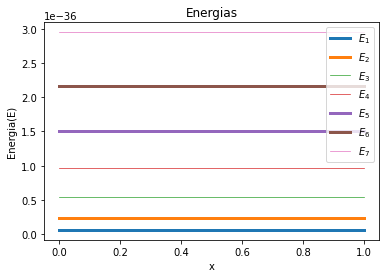

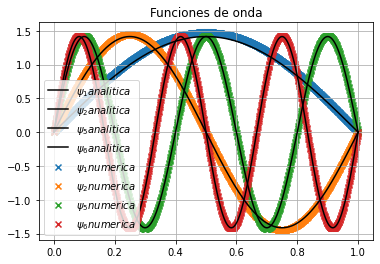

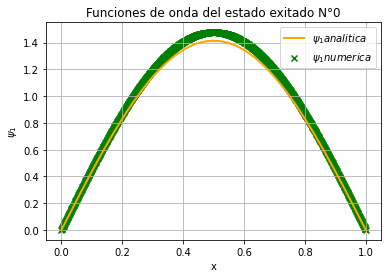

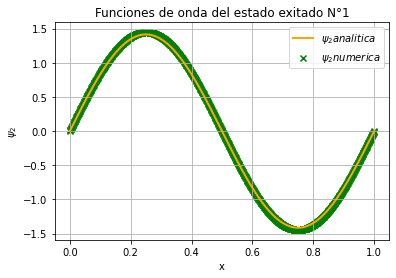

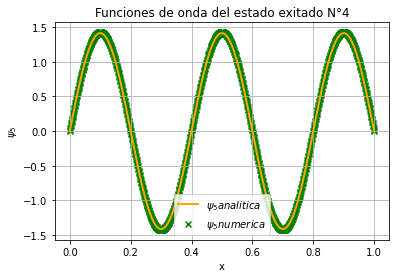

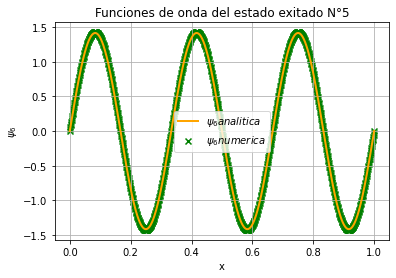

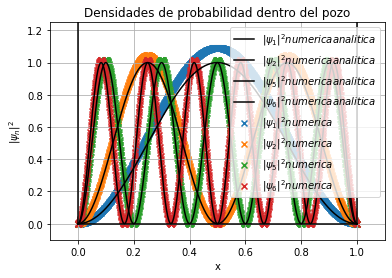

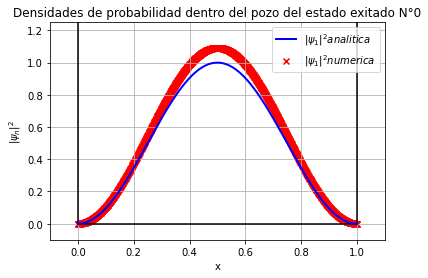

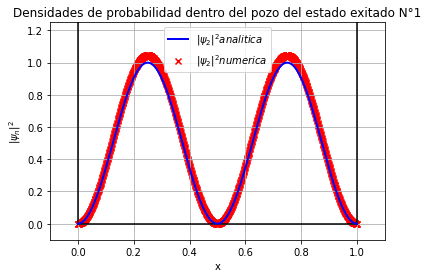

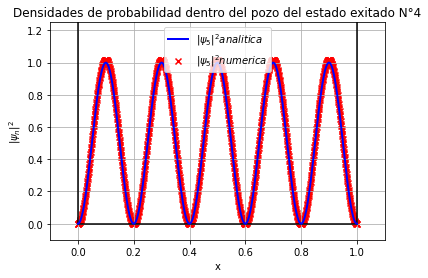

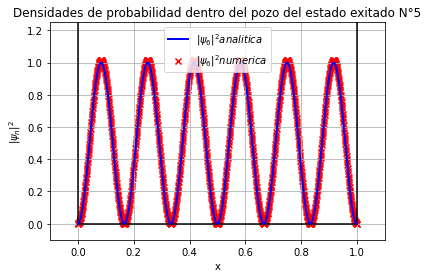

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import scipy.constants as sp

##Valores que el usuario dara


L=1
m=9.11e-31
precision=P=1000
N=[1,2,5,6]

#
mistake=mst=0.2
#


#Calculos que se usaran despues
n=max(N)
b=min(N)

x=np.linspace(0,L,P)

##Definimos todas las funciones analiticas que usaremos

def eigen_energy(m,n):

    pi=np.pi

    E_1= (sp.hbar**2)*(pi**2)/(2*m*L**2)
    E_n=E_1*(n**2)
    return E_n

def analy_wave_func(x,L,n):

    phi_n= ((2/L)**.5) *np.sin((n*np.pi*x)/L)
    return phi_n

def prob_desity(x,L,n):

    phi_n = np.sin((n*np.pi*x)/L)
    phi2_n=(phi_n)**2
    return phi2_n

#Para las solucuones numericas fedinimos una funcion que contenga el sistema de ecuaciones y se resulve con un
#odeint

y0=0
z0=((2/L)**.5)*(1*np.pi)/L

def pozo (U,x):
       y=U[0]
       z=U[1]
       dy=z
       dz=-y*((n*np.pi)/L)**2
       return[dy,dz]

U0=[y0,z0]
resul=odeint(pozo, U0, x)







##Para presentar las energias de los estados ligados
#/////////////////////////////////////////////////////////////////////////////////////////////////////////////
fig, axes = plt.subplots()

plt.title('Energias')
axes.set(ylabel='Energia(E)',xlabel='x')

indice=list(range(b,n+2))

for i in indice :
    E=eigen_energy(m, i)
    if i in N:
        plt.plot(x,[E]*P,linewidth=3,label='$E_{{{}}}$'.format(i))
    else:
        plt.plot(x,[E]*P,linewidth=0.7,label='$E_{{{}}}$'.format(i))


axes.legend()








##Ahora presentamos las soluciones de la ecuacion de Schrodinger analitica y numericamente, en la misma
##Grafica y por separado
#////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

fig, axes = plt.subplots()
axes.grid()



plt.title("Funciones de onda")

for k in N:

    def pozo (U,x):
       y=U[0]
       z=U[1]
       dy=z
       dz=-y*((k*np.pi)/L)**2

       return[dy,dz]

    U0=[y0,k*z0+mst]
    resul=odeint(pozo, U0, x)
    #print(np.shape(resul))


    axes.scatter(x,resul[:,0],marker='x',label='$\psi_{{{}}} numerica$'.format(k))

    y_dens=analy_wave_func(x, L, k)
    plt.plot(x,y_dens,color='k',label='$\psi_{{{}}} analitica$'.format(k))


    axes.legend()


for k in N:

    def pozo (U,x):
       y=U[0]
       z=U[1]
       dy=z
       dz=-y*((k*np.pi)/L)**2

       return[dy,dz]

    U0=[y0,k*z0+mst]
    resul=odeint(pozo, U0, x)

    #print(np.shape(resul))

    fig, axes = plt.subplots()
    axes.set(ylabel='$\psi_{}$'.format(k),xlabel='x')
    plt.title("Funciones de onda del estado exitado N°{}".format(k-1))
    axes.grid()



    axes.scatter(x,resul[:,0],marker='x',color='g',label='$\psi_{{{}}} numerica$'.format(k))

    y_dens=analy_wave_func(x, L, k)
    plt.plot(x,y_dens,color='orange',linewidth=2,label='$\psi_{{{}}} analitica$'.format(k))

    axes.legend()





##Hacemos lo mismo pero para las densidades de probabilidad
#////////////////////////////////////////////////////////////////////////////////////////////////////////////////

fig, axes = plt.subplots()
axes.grid()

axes.set(ylabel='$|\psi_n|^2$',xlabel='x')
axes.set_ylim(-0.1,1.25)
axes.set_xlim(-0.1,0.1+L)
plt.plot([0,0],[0,2],color='black')
plt.plot([L,L],[0,2],color='black')
plt.plot([0,L],[0,0],color='black')

plt.title("Densidades de probabilidad dentro del pozo")

for k in N:

    def pozo (U,x):
       y=U[0]
       z=U[1]
       dy=z
       dz=-y*((k*np.pi)/L)**2

       return[dy,dz]

    U0=[y0,k*z0+mst]
    resul=odeint(pozo, U0, x)
    #print(np.shape(resul))


    axes.scatter(x,(resul[:,0]/((2/L)**.5))**2,marker='x',label='$|\psi_{{{}}}|^2 numerica$'.format(k))
    y_dens=prob_desity(x, L, k)
    plt.plot(x,y_dens,color='k',label='$|\psi_{{{}}}|^2 numerica analitica$'.format(k))


    axes.legend()

for k in N:

    def pozo (U,x):
       y=U[0]
       z=U[1]
       dy=z
       dz=-y*((k*np.pi)/L)**2

       return[dy,dz]

    U0=[y0,k*z0+mst]
    resul=odeint(pozo, U0, x)

    #print(np.shape(resul))

    fig, axes = plt.subplots()


    plt.title("Densidades de probabilidad dentro del pozo del estado exitado N°{}".format(k-1))
    axes.grid()
    axes.set(ylabel='$|\psi_n|^2$',xlabel='x')
    axes.grid()

    axes.set_ylim(-0.1,1.25)
    axes.set_xlim(-0.1,0.1+L)
    plt.plot([0,0],[0,2],color='black')
    plt.plot([L,L],[0,2],color='black')
    plt.plot([0,L],[0,0],color='black')




    axes.scatter(x,(resul[:,0]/((2/L)**.5))**2,marker='x',color='r',label='$|\psi_{{{}}}|^2 numerica$'.format(k))
    y_dens=prob_desity(x, L, k)
    plt.plot(x,y_dens,color='b',linewidth=2,label='$|\psi_{{{}}}|^2 analitica$'.format(k))



    plt.title("Densidades de probabilidad dentro del pozo del estado exitado N°{}".format(k-1))
    axes.grid()
    axes.legend()


# Pozo de potencial 2D

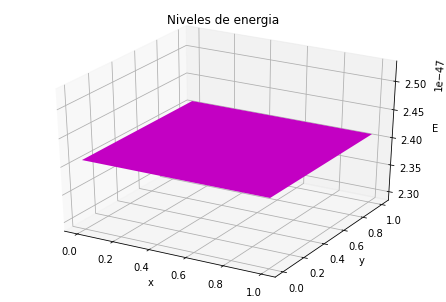

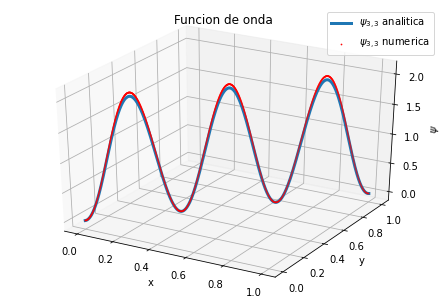

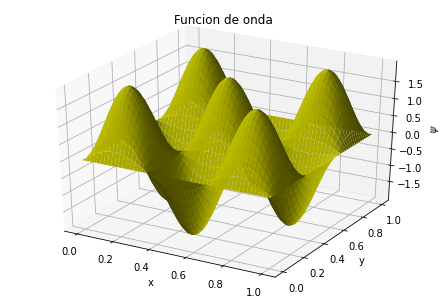

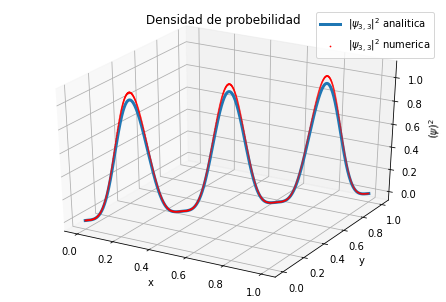

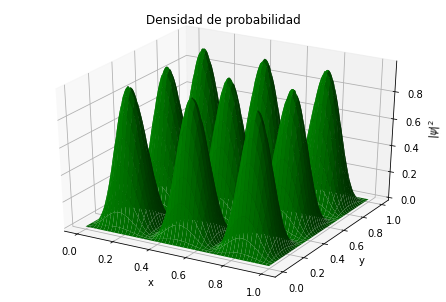

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
#import scipy.constants as sp
from mpl_toolkits.mplot3d import Axes3D


#Datos que aporta el usuario
n_x=3
n_y=3

L_x=1
L_y=1

m=9.11e-31
PRESICION=P=1000

mst=0.2

#Calculos y funciones que se usaran para las graficas
x=np.linspace(0,L_x,P)
y=np.linspace(0,L_y,P)

X,Y = np.meshgrid(x,y)

xx, yy = np.meshgrid(range(L_x+1), range(L_y+1))
zz = yy*0

y0x=0
y0y=0
z0x=((2/L_x)**.5)*(1*np.pi)/L_x
z0y=((2/L_y)**.5)*(1*np.pi)/L_y

def eigen_energi(m,n_x,n_y):

    pi=np.pi

    E_1= (sp.hbar**2)*(pi**2)/(2*m*((L_x)**2)*((L_y)**2))
    E_p=E_1*((n_x)^2+(n_y)^2)
    return E_p

#def analy_wave_func(x,L,n):

    #phi_n= ((2/L)**.5) *np.sin((n*np.pi*x)/L)
    #return phi_n

#def prob_desity(x,L,n):

    #phi_n = np.sin((n*np.pi*x)/L)
    #phi2_n=(phi_n)**2
    #return phi2_n


def pozo (U,x):
       y=U[0]
       z=U[1]
       dy=z
       dz=-y*((n_x*np.pi)/L_x)**2

       return[dy,dz]

U0=[y0x,n_x*z0x+mst]
resul2_x=odeint(pozo, U0, x)


def pozo (U,x):
       y=U[0]
       z=U[1]
       dy=z
       dz=-y*((n_y*np.pi)/L_y)**2

       return[dy,dz]

U0=[y0y,+n_y*z0y+mst]
resul2_y=odeint(pozo, U0, x)





#Grafica de el nivel de energia
#///////////////////////////////////////////////////////////////

fig=plt.figure()

axes=Axes3D(fig)
axes.set(xlabel='x',ylabel='y',zlabel='E')



axes.plot_surface(xx,yy,zz+eigen_energi(9.11e-21,3,3),color='magenta')

plt.title("Niveles de energia")
plt.show()



#Graficamos las funciones de onda
#//////////////////////////////////////////////////////////////////

fig=plt.figure()

axes=Axes3D(fig)
axes.set(xlabel='x',ylabel='y',zlabel='$\psi$')


resul1_x=analy_wave_func(x, L_x, n_x)
resul1_y=analy_wave_func(y, L_y, n_y)

axes.plot(x,y,resul1_x*resul1_y,linewidth=3,label='$\psi_{{{},{}}}$ analitica'.format(n_x,n_y))
axes.scatter(x,y,resul2_x[:,0]*resul2_y[:,0],color='red',s=0.5,label='$\psi_{{{},{}}}$ numerica'.format(n_x,n_y))

axes.legend()

plt.title("Funcion de onda")
plt.show()




#Ahora la grafica linda
fig=plt.figure()

axes=Axes3D(fig)
axes.set(xlabel='x',ylabel='y',zlabel='$\psi$')

#X,Y = np.meshgrid(x,y)

resul_x=analy_wave_func(X, L_x, n_x)
resul_y=analy_wave_func(Y, L_y, n_y)

axes.plot_surface(X,Y,resul_x*resul_y,color='y')


plt.title("Funcion de onda")
plt.show()




##Ahora las densidades de probabilidad
#////////////////////////////////////////////////////////////////////////////////////////////


fig=plt.figure()

axes=Axes3D(fig)
axes.set(xlabel='x',ylabel='y',zlabel='$(\psi)^2$')


resul1_x=prob_desity(x, L_x, n_x)
resul1_y=prob_desity(x, L_y, n_y)

axes.plot(x,y,resul1_x*resul1_y,linewidth=3,label='$|\psi_{{{},{}}}|^2$ analitica'.format(n_x,n_y))
axes.scatter(x,y,(resul2_x[:,0]/((2/L_x)**.5))**2 * (resul2_y[:,0]/((2/L_y)**.5))**2,color='red',s=0.5,label='$|\psi_{{{},{}}}|^2$ numerica'.format(n_x,n_y))

axes.legend()

plt.title("Densidad de probebilidad")
plt.show()


#Ahora la grafica linda
fig=plt.figure()

axes=Axes3D(fig)
axes.set(xlabel='x',ylabel='y',zlabel='$|\psi|^2$')

X,Y = np.meshgrid(x,y)

resul_x=prob_desity(X, L_x, n_x)
resul_y=prob_desity(Y, L_y, n_y)

axes.plot_surface(X,Y,resul_x*resul_y,color='g')

plt.title("Densidad de probabilidad")
plt.show()


# Animacion

La solucion de la ecuacion de Schrodinger dependiente del tiempo para el pozo de potencial 1D es:

$\psi(x,t)=(\frac{2}{L})^\frac{1}{2}sen(\frac{n\pi x}{L})e^{\frac{-iEt}{\hbar}}$

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


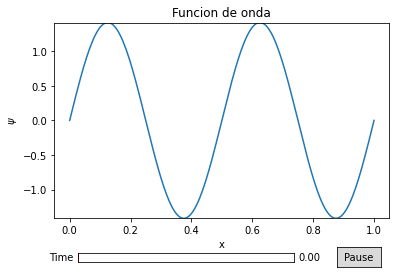

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


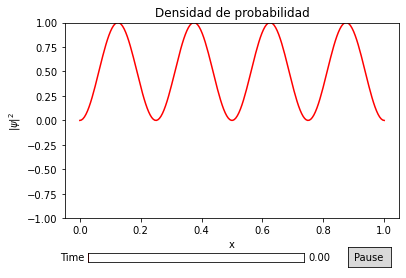

In [ ]:
%pip install animatplot

import numpy as np
import matplotlib.pyplot as plt
import animatplot as amp
import scipy.constants as sp

#Valores que el usuario dara

N=4
L=1
m=9.11e-31


pi=np.pi
hbar=sp.hbar


E=eigen_energy(m, N)
#print (E)
sigma = 0
omega = -E/hbar
s = complex(sigma,omega)

##Moverle aqui si no se mueve nada, o se mueve muy rapido
x=np.linspace(0,1,200)
t=np.linspace(0,10000,200)


X,T = np.meshgrid(x,t)
Y = ((2/L)**0.5)*np.sin(N*pi*X/L)*np.exp(s*T)
Z = (Y**2)*(L/2)
a=(2/L)**0.5


fig=plt.figure()
plt.title('Funcion de onda')
plt.xlabel('x')
plt.ylabel('$\psi$')
plt.ylim(-a,a)

block= amp.blocks.Line(X,Y)
anim=amp.Animation([block],t)



anim.controls()
plt.show()




fig=plt.figure()
plt.title('Densidad de probabilidad')
plt.xlabel('x')
plt.ylabel('$|\psi|^2$')
plt.ylim(-1,1)

block= amp.blocks.Line(X,Z,color='r')
anim=amp.Animation([block],t)



anim.controls()
plt.show()